In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap

from natsort import os_sorted
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
def flatten(regular_list):
    return [item for sublist in regular_list for item in sublist]

In [3]:
delta_df = pd.read_csv('../../data/dtag_experiments/1D_delta_df.tsv',sep='\t',index_col=0)

inds = flatten([np.array([3,4,5])+i*6 for i in range(0,8)])

delta_df_filt = delta_df.iloc[:,inds]

In [4]:
color_dict = {
    'AQR':'tab:orange',
    'DDX46':'tab:brown',
    'DHX15':'tab:blue',
    'DHX16':'tab:cyan',
    'DHX38':'tab:pink',
    'PRPF8':'tab:green',
    'SF3B1':'tab:red',
    'U2AF2':'tab:purple'
}

legend_elements = [
    Patch(
        facecolor=color_dict[i],
        label=i
    ) for i in os_sorted(list(color_dict.keys()))    
]

In [5]:
x = StandardScaler().fit_transform(delta_df_filt.transpose())

pca = PCA(n_components=len(delta_df_filt.columns))

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents,
)

colors = [color_dict[i.split('_')[0]] for i in delta_df_filt.columns]
    
targets = ['_'.join([j[0],j[3]]) for j in [i.split('_') for i in delta_df_filt.columns]]


finalDf = pd.concat(
    [
        principalDf, 
        pd.Series(colors), 
        pd.Series(targets),
    ], axis = 1)


pca_var_dict = {
    principalDf.columns[i]:pca.explained_variance_ratio_[i] 
    for i in range(len(principalDf.columns))}

In [20]:
colors = [color_dict[i.split('_')[0]] for i in delta_df_filt.columns]
    
symbols = ['.']*len(delta_df_filt.columns)
targets = ['_'.join([j[0],j[3]]) for j in [i.split('_') for i in delta_df_filt.columns]]

umap_space_1 = umap.UMAP(
    n_neighbors=4,
    min_dist=0.2,
    init='spectral',
    metric='euclidean'
).fit_transform(
    principalDf.iloc[:,:6]
)


umap_final_1 = pd.concat(
    [
        pd.DataFrame(umap_space_1),
        pd.Series(colors),
        pd.Series(symbols),
        pd.Series(targets)
    ],
    axis=1
)

umap_final_1.columns = [
    'umap x',
    'umap y',
    'color',
    'symbol',
    'target'
]

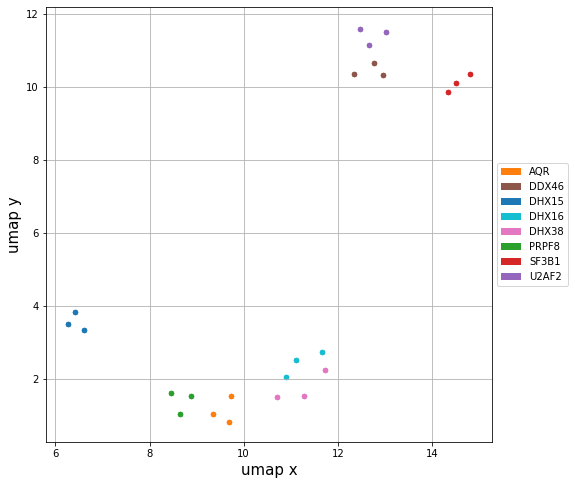

In [21]:
pc_x = 'umap x'
pc_y = 'umap y'

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(pc_x, fontsize = 15)
ax.set_ylabel(pc_y, fontsize = 15)


for target in targets:
    indicesToKeep = umap_final_1.iloc[:,-1] == target
    color = umap_final_1.loc[indicesToKeep,'color'].values[0]
    symbol = umap_final_1.loc[indicesToKeep,'symbol'].values[0]
    ax.scatter(umap_final_1.loc[indicesToKeep, pc_x],
               umap_final_1.loc[indicesToKeep, pc_y],
               c = color,
               s = 75,
               marker=symbol,
              )



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(handles = legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()
